# Entrance Challenge: When Will the Sakura Bloom?

# 0. Basics of the Sakura Bloom-cycle (5pts total)

In a year, sakura trees basically go through 4 phases: energy production, hibernation, growth, and of course flowering. These phases
roughly follow the seasons, but not exactly. <br>

   Production phase： Initial development of the buds（Summer-Fall） <br>
   Hibernation phase： Bud growth stops while the tree goes into hibernation（Late Fall-Winter） <br>
   Growth phase： Buds once again continue to grow when the tree comes out of its winter hibernation（Late Winter-Spring） <br>
   Flowering phase： The buds finally bloom in spring (as climate conditions allow), once they have been able to fully develop.（Spring） <br>
    
Each year, near the end of winter but before the trees finally bloom, the hibernation period ends. The sakura that rested through the winter once gain become metabolically active, and the buds continue to grow (though we may not immediately notice when this happens.) However, the cycle is not simply clockwork- for example, in places where the temperature is above 20℃ year-round, the trees are unable to hibernate sufficiently, and thus cannot blossom.
    
In this challenge, we have outlined the basic mechanism by which the sakura reach their eventual bloom-date. We consider building a bloom-date prediction model for the case of sakura in Tokyo, with the data split as follows: <br>
    
Test years： 1966, 1971, 1985, 1994, and 2008 <br>
Training years: 1961 to 2017 (Excluding the test years) <br>
    
You should fit the model to the data from the training years, then use the model to predict the bloom-date for each of the test years. The 3 models to be applied to the data are described below.
    


### Problem 0-1: (5pts)
Acquire data of sakura blooming date (桜の開花日) for Tokyo from 1961 to 2018 using the Japanese Meteorological Agency website (気象庁).

In [1]:



# http://www.data.jma.go.jp/sakura/data/sakura003_06.html
  

***
## 1. Prediction using the "600 Degree Rule" (15pts total)

For a rough approximaton of the bloom-date, we start with a simple "rule-based" prediction model, called the "600 Degree Rule". The rule consists of logging the maximum temperature of each day, starting  on February 1st, and sum these temperatures until the sum surpasses 600$^\circ$C. The day that this happens is the predicted bloom-date. This 600$^\circ$C threshold is used to easily predict bloom-date in various locations varies by location. However, for more precise predictions, it should be set differently for every location. In this challenge, we verify the accuracy of the "600 Degree Rule" in the case of Tokyo.

In [2]:
import pandas as pd
import math as m
data=pd.read_csv('sakura .csv')
train = data.loc[~data['year'].isin(['1966', '1971', '1985', '1994','2008'])].reset_index(drop=True)
test = data.loc[data['year'].isin(['1966', '1971', '1985', '1994','2008'])].reset_index(drop=True)
year_1966= test.loc[test['year'].isin(['1966'])]
year_1966 = year_1966.drop( year_1966[(year_1966['month']<2)].index).reset_index(drop=True)
total=0
date=0
month=0
counter=0
for i in year_1966['max temp']:
    counter=counter+1
    total=total+i
    if total>=600:
        
        break
month=year_1966.at[counter,'month']    
day=year_1966.at[counter,'day']
print("year 1966",total,counter,month,day)   
year_1971= test.loc[test['year'].isin(['1971'])]
year_1971 = year_1971.drop( year_1971[(year_1971['month']<2)].index).reset_index(drop=True)
total=0
date=0
month=0
counter=0
for i in year_1971['max temp']:
    counter=counter+1
    total=total+i
    if total>=600:
        
        break
month=year_1971.at[counter,'month']    
day=year_1971.at[counter,'day']
print("year 1971",total,counter,month,day)
year_1985= test.loc[test['year'].isin(['1985'])]
year_1985 = year_1985.drop( year_1985[(year_1985['month']<2)].index).reset_index(drop=True)
total=0
date=0
month=0
counter=0
for i in year_1985['max temp']:
    counter=counter+1
    total=total+i
    if total>=600:
        
        break
month=year_1985.at[counter,'month']    
day=year_1985.at[counter,'day']
print("Year 1985",total,counter,month,day)  
year_1994= test.loc[test['year'].isin(['1994'])]
year_1994 = year_1994.drop( year_1994[(year_1994['month']<2)].index).reset_index(drop=True)
total=0
date=0
month=0
counter=0
for i in year_1994['max temp']:
    counter=counter+1
    total=total+i
    if total>=600:
        
        break
month=year_1994.at[counter,'month']    
day=year_1994.at[counter,'day']
print("Year 1985",total,counter,month,day) 
year_2008= test.loc[test['year'].isin(['2008'])]
year_2008 = year_2008.drop( year_2008[(year_2008['month']<2)].index).reset_index(drop=True)
total=0
date=0
month=0
counter=0
for i in year_2008['max temp']:
    counter=counter+1
    total=total+i
    if total>=600:
        
        break
month=year_2008.at[counter,'month']    
day=year_2008.at[counter,'day']
print("Year 2008",total,counter,month,day) 

year 1966 607.5999999999998 48 3 21
year 1971 605.6000000000001 55 3 28
Year 1985 604.4 57 3 30
Year 1985 608.8999999999999 56 3 29
Year 2008 614.8000000000002 52 3 24


### Problem 1-1: (5pts)
From here-on, we refer to the bloom-date in a given year $j$ as $BD_{j}$. For each year in the training data, calculate the accumulated daily maximum temperature from February 1st to the actual bloom-date $BD_{j}$, and plot this accumulated value over the training period. Then, average this accumulated value as $T_{mean}$, and verify whether we should use 600$^\circ$C as a rule for Tokyo.

In [3]:
train_years=train['year'].unique()
print(train_years)
train_years[1]
print(len(train_years))

[1961 1962 1963 1964 1965 1967 1968 1969 1970 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1986 1987 1988 1989 1990 1991
 1992 1993 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2009 2010 2011 2012 2013 2014 2015 2016 2017]
52


In [4]:
A=[ ]*(len(train_years)+1)
total_list=[0]*52
temperature_list=[0]*(len(train_years))
train_without_jan=train.drop( train[(train['month']<2)].index).reset_index(drop=True)
for i in range (0,52):
    A.append(train_without_jan.loc[train_without_jan['year'].isin([train_years[i]])].reset_index(drop=True))
overall_total=0

for x in range (0,52):
    G=A[x]
    total=0
    date=0
    counter=0
    year_count=0
    for i in A[x]['bloom']:
        temp=A[x].at[counter,'max temp']    
        counter=counter+1
        total=total+temp
        if i==1:
            year_count=year_count+1
            overall_total=total+overall_total
            temperature_list[x]=total
            year=A[x].at[counter,'year']
            print(year,"Total heat required",total)
            break
Average_heat_required=overall_total/52
print(Average_heat_required)    

1961 Total heat required 720.9999999999999
1962 Total heat required 768.1000000000001
1963 Total heat required 701.6999999999999
1964 Total heat required 676.6000000000001
1965 Total heat required 642.1999999999997
1967 Total heat required 660.8000000000001
1968 Total heat required 654.5999999999999
1969 Total heat required 724.0000000000001
1970 Total heat required 696.3000000000001
1972 Total heat required 610.4
1973 Total heat required 705.3
1974 Total heat required 658.0000000000001
1975 Total heat required 607.9000000000001
1976 Total heat required 596.6999999999999
1977 Total heat required 556.7
1978 Total heat required 640.0999999999998
1979 Total heat required 631.7999999999998
1980 Total heat required 640.6000000000001
1981 Total heat required 600.1
1982 Total heat required 581.5
1983 Total heat required 662.4999999999999
1984 Total heat required 643.7000000000002
1986 Total heat required 627.4999999999999
1987 Total heat required 588.7
1988 Total heat required 649.69999999999

In [5]:
import seaborn as sns
ax = sns.distplot( temperature_list)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 288x360 with 0 Axes>

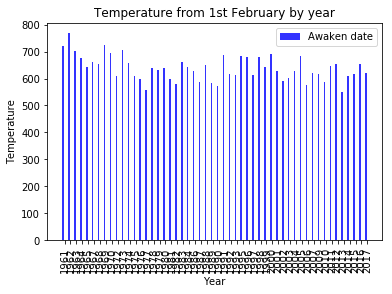

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(4,5))

fig, ax = plt.subplots()
index = np.arange(len(train_years))
bar_width = 0.25
opacity = 0.8
rects1 = plt.bar(index,temperature_list, bar_width,alpha=opacity,color='b',label='Awaken date')
plt.rcParams["figure.figsize"] = [14,14]

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature from 1st February by year')
plt.xticks(index + bar_width, train_years,rotation=90)

plt.legend()

From this normal distrution with having mean at 638 we can say that 600 rule is a good apporoximation.  

### Problem 1-2: (10pts)

Use the average accumulated value $T_{mean}$ calculated in 1-1 to predict $BD_{j}$ for each test year, and show the error from the actual $BD_{j}$. Compare to the prediction results when 600$^\circ$C is used a threshold value, and evaluate both models using the coefficient of determination ($R^2$ score).

In [7]:
test_without_jan=test.drop( test[(test['month']<2)].index).reset_index(drop=True)
test_years=test['year'].unique()
print(test_years)
test_years[1]
print(len(test_years))

[1966 1971 1985 1994 2008]
5


In [8]:
test_frame=[ ]*(len(test_years)+1)
Error_my=[0]*(len(test_years))
S_Error_my=[0]*(len(test_years))
Error_600=[0]*(len(test_years))
S_Error_600=[0]*(len(test_years))
for i in range (0,5):
    test_frame.append(test_without_jan.loc[test_without_jan['year'].isin([test_years[i]])].reset_index(drop=True))

In [9]:
test_frame[4].head()

,serial,year,month,day,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom
0,17197,2008,2,1,1014.7,1019.3,0.0,0.0,0.0,5.0,9.4,1.8,29,19,9.5,0
1,17198,2008,2,2,1017.4,1022.0,0.0,0.0,0.0,4.8,7.1,2.1,35,26,0.9,0
2,17199,2008,2,3,1007.3,1011.8,23.0,2.5,0.5,1.5,5.0,0.7,83,53,0.0,0
3,17200,2008,2,4,1009.3,1013.8,0.0,0.0,0.0,4.7,8.5,-0.1,62,39,9.5,0
4,17201,2008,2,5,1012.5,1017.0,0.0,0.0,0.0,5.6,9.1,1.8,52,32,7.1,0


In [10]:
from sklearn.metrics import r2_score

overall_total=0
My_guess_error_RMSE=0
sixhundred_guess_error_RMSE=0
Tmean=[0]*5
T_600=[0]*5
Actual=[0]*5
for x in range (0,5):
    Acc=0
    total=0
    date=0
    counter=0
    year_count=0
    for i in test_frame[x]['bloom']:
        temp=test_frame[x].at[counter,'max temp']    
        counter=counter+1
        total=total+temp
        if i==1:
            year_count=year_count+1
            overall_total=total+overall_total
            year=test_frame[x].at[counter,'year']
            month=test_frame[x].at[counter,'month']    
            day=test_frame[x].at[counter,'day']
            Acc=counter
            Actual[x]=counter
            print("!!Actual!!","year:",year,'\n',"Total heat required: ",total," total days required:",counter," months:",month," days:",day)
            break
    total=0
    date=0
    counter=0
    date=0
    month=0
    year_count=0
    for i in test_frame[x]['max temp']:
        temp=test_frame[x].at[counter,'max temp']    
        counter=counter+1
        total=total+temp
        if total>=638:
        
            break
    month=test_frame[x].at[counter,'month']    
    day=test_frame[x].at[counter,'day']
    print(total,counter,month,day) 
    year=test_frame[x].at[counter,'year']
    S_Error_my[x]=(counter-Acc)*(counter-Acc)
    Error_my[x]=abs(counter-Acc)
    My_guess_error_RMSE=My_guess_error_RMSE+S_Error_my[x]
    Tmean[x]=counter
    print("!!Prediction 638!!","year:",year,"Error_absolute_my",Error_my[x],'\n', "total days required:",counter," months_pred:",month," days_pred:",day)
    total=0
    date=0
    counter=0
    date=0
    month=0
    year_count=0
    for i in test_frame[x]['max temp']:
        temp=test_frame[x].at[counter,'max temp']    
        counter=counter+1
        total=total+temp
        if total>=600:
        
            break
    month=test_frame[x].at[counter,'month']    
    day=test_frame[x].at[counter,'day']
    print(total,counter,month,day) 
    year=test_frame[x].at[counter,'year']
    Error_600[x]=abs(counter-Acc)
    S_Error_600[x]=(counter-Acc)*(counter-Acc)
    sixhundred_guess_error_RMSE= sixhundred_guess_error_RMSE + S_Error_600[x]
    T_600[x]=counter
    print("!!Prediction 600!! ","year:",year,"Error_Absolue_600",Error_600[x],'\n', "total days required:",counter," months_pred:",month," days_pred:",day)
My_guess_error_RMSE=m.sqrt(My_guess_error_RMSE)
Tmean_R2=r2_score(Actual,Tmean)
T_600_R2=r2_score(Actual,T_600)
print("Tmean MSE",My_guess_error_RMSE)
sixhundred_guess_error_RMSE=m.sqrt(sixhundred_guess_error_RMSE)
print("600 degree rule MSE",sixhundred_guess_error_RMSE)
print("Tmean R2",Tmean_R2)
print("T_600 R2",T_600_R2)

!!Actual!! year: 1966 
 Total heat required:  607.5999999999998  total days required: 48  months: 3  days: 21
649.6999999999998 51 3 24
!!Prediction 638!! year: 1966 Error_absolute_my 3 
 total days required: 51  months_pred: 3  days_pred: 24
607.5999999999998 48 3 21
!!Prediction 600!!  year: 1966 Error_Absolue_600 0 
 total days required: 48  months_pred: 3  days_pred: 21
!!Actual!! year: 1971 
 Total heat required:  663.4000000000001  total days required: 58  months: 3  days: 31
644.8000000000001 57 3 30
!!Prediction 638!! year: 1971 Error_absolute_my 1 
 total days required: 57  months_pred: 3  days_pred: 30
605.6000000000001 55 3 28
!!Prediction 600!!  year: 1971 Error_Absolue_600 3 
 total days required: 55  months_pred: 3  days_pred: 28
!!Actual!! year: 1985 
 Total heat required:  677.8000000000001  total days required: 62  months: 4  days: 4
644.6 60 4 2
!!Prediction 638!! year: 1985 Error_absolute_my 2 
 total days required: 60  months_pred: 4  days_pred: 2
604.4 57 3 30
!!Pr

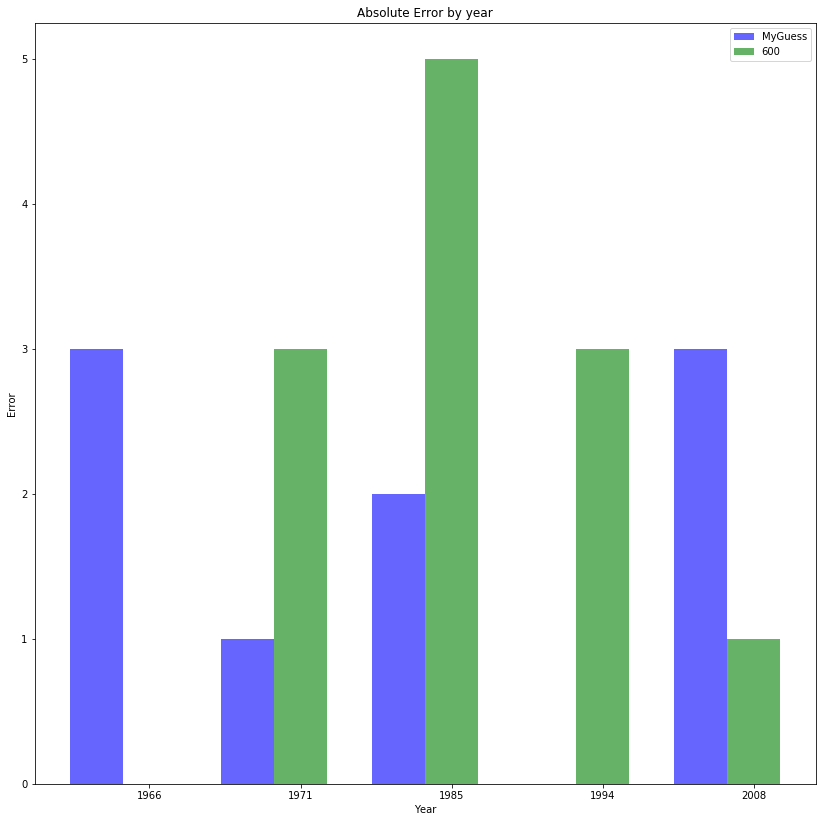

In [11]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
index = np.arange(len(test_years))
bar_width = 0.35
opacity = 0.6

rects1 = plt.bar(index, Error_my, bar_width,alpha=opacity,color='b',label='MyGuess')
rects2 = plt.bar(index + bar_width, Error_600, bar_width,alpha=opacity,color='g',label='600')
plt.xlabel('Year')
plt.ylabel('Error')
plt.title('Absolute Error by year')
plt.xticks(index + bar_width, test_years)
plt.legend()

***
## 2. Linear Regression Model: Transform to Standard Temperature (30pts total)

The year to year fluctuation of the bloom-date depends heavily upon the actual temperature fluctuation (not just the accumulated maximum). In order to get to a more physiologically realistic metric,  Sugihara et al. (1986) considered the actual effect of temperature on biochemical activity. They introduced a method of "standardizing" the temperatures measured, according to the fluctuation relative to a standard temperature.

In order to make such a standardization, we apply two major assumptions, outlined below.

#### 1) The Arrhenius equation: <br>

The first assumption, also known in thermodynamics as the "Arrhenius equation", deals with chemical reaction rates and can be written as follows:

$$
k = A \exp{ \Bigl(- \frac{E_{a}}{RT}} \Bigr)
$$ <br>

Basically, it says that each reaction has an activation energy, $E_{a}$ and a pre-exponential factor $A$. Knowing these values for the particular equation, we can find the rate constant $k$ if we know the temperature, $T$, and applying the universal gas constant, $R = 8.314 \rm [J/K・mol]$.

#### 2) Constant output at constant temperature: <br>

The second assumption, is simply that the output of a reaction is a simple product of the duration and the rate constant $k$, and that product is constant even at different temperatures.
    
$$
tk = t'k' = t''k'' = \cdots = \rm{const}
$$ <br>


Making the assumptions above, we can determine a "standard reaction time", $t_{s}$ required for the bloom-date to occur. We can do so in the following way:

<br>
$$
t_{s} = \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>

We define $T_{i, j}$ as the daily average temperature, and use a standard temperature of $T_{s} = 17^\circ\rm{C}$. For a given year $j$, with the last day of the hibernation phase set as $D_ {j}$, we define the number of "transformed temperature days",  $DTS_{ J}$,  needed to reach from $D_ {j}$ to the bloom-date $BD_{j}$ with the following equation:


<br>
$$
DTS_{j} = \sum_{i=D_{j}}^{BD_{j}} t_{s} = \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>



From that equation, we can find the average $DTS$ for $x$ number of years ($DTS_{ mean}$) as follows: 

<br>
$$
\begin{align}
DTS_{\rm{mean}} &= \frac{1}{x} \sum_{j}^{x} DTS_{j} \\
&= \frac{1}{x} \sum_{j}^{x} \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
\end{align}
$$ <br> <br>

In this exercise, we assume that $DTS_{ mean}$ and $E_{ a}$ are constant values, and we use the data from the training years to fit these 2 constants. The exercise consists of 4 steps:
1. Calculate the last day of the hibernation phase $D_ {j}$ for every year $j$.
2. For every year $j$, calculate $DTS_{ j}$ as a function of $E_{ a}$, then calculate the average (over training years) $DTS_{ mean}$ also as a function of $E_{ a}$.
3. For every year $j$, and for every value of $E_{ a}$, accumulate $t_{s}$ from $D_ {j}$ and predict the bloom date $BD_{j}^{\rm{pred}}$ as the day the accumulated value surpasses $DTS_{ mean}$. Calculate the bloom date prediction error as a function of $E_{ a}$, and find the optimal $E_{ a}$ value that minimizes that error.
4. Use the previously calculated values of $D_ {j}$, $DTS_{ mean}$, and $E_{ a}$ to predict bloom-day on years from the test set.


### Problem 2-1: (5pts)
According to Hayashi et al. (2012), the day on which the sakura will awaken from their hibernation phase, $D_{j}$, for a given location, can be approximated by the following equation:
<br> <br>
$$
D_{j} = 136.75 - 7.689 \phi + 0.133 \phi^{2} -1.307\ln L + 0.144T_{F} + 0.285T_{F}^2
$$ <br>

where $\phi$ is the latitude [°N], $L$ is the distance from the nearest coastline [km], and $T_{F}$ is that location's average temperature [°C] over the first 3 months of a given year. In the case of Tokyo, $\phi = 35°40'$ and $L=4\rm{km}$.

Find the $D_{j}$ value for every year $j$ from 1961 to 2017 (including the test years), and plot this value on a graph. 

(In Problem 1, we had assumed a $D_j$ of February 1st.)

In [12]:
import math as m
All_years=data['year'].unique()
A=[ ]
Awaken=[0]*57
for i in range (0,57):
    A.append(data.loc[data['year'].isin([All_years[i]])].reset_index(drop=True))
L=4
Phi=35+(40/60)
for x in range (0,57):
    Acc=0
    total=0
    date=0
    counter=0
    year_count=0
    for i in A[x]['month']:
        if i<=3:
            temp=A[x].at[counter,'avg temp']    
            counter=counter+1
            total=total+temp
        if i>3 or (A[x].at[counter,'year']== 2017 and A[x].at[counter,'day'] == 31 and A[x].at[counter,'month']== 3) :
            year_count=year_count+1
            year=A[x].at[counter,'year']
            day=A[x].at[counter,'day']
            Average=total/counter
            Awaken[x]=136.75-7.689*Phi+0.133*Phi*Phi-1.307*(m.log(L))+0.144*Average+0.285*Average*Average
            month=A[x].at[counter,'month']    

            print(year,"Awake from hibernation",int(Awaken[x])) 
            D=Awaken
            #print("!!Actual!!","year:",year,'\n',"Total heat required: ",total," total days required:",counter," months:",month," days:",day)
            break

1961 Awake from hibernation 39
1962 Awake from hibernation 41
1963 Awake from hibernation 38
1964 Awake from hibernation 40
1965 Awake from hibernation 38
1966 Awake from hibernation 45
1967 Awake from hibernation 42
1968 Awake from hibernation 43
1969 Awake from hibernation 42
1970 Awake from hibernation 38
1971 Awake from hibernation 42
1972 Awake from hibernation 45
1973 Awake from hibernation 44
1974 Awake from hibernation 39
1975 Awake from hibernation 40
1976 Awake from hibernation 45
1977 Awake from hibernation 40
1978 Awake from hibernation 41
1979 Awake from hibernation 50
1980 Awake from hibernation 42
1981 Awake from hibernation 41
1982 Awake from hibernation 45
1983 Awake from hibernation 44
1984 Awake from hibernation 35
1985 Awake from hibernation 41
1986 Awake from hibernation 39
1987 Awake from hibernation 46
1988 Awake from hibernation 45
1989 Awake from hibernation 51
1990 Awake from hibernation 48
1991 Awake from hibernation 46
1992 Awake from hibernation 48
1993 Awa

<Figure size 288x360 with 0 Axes>

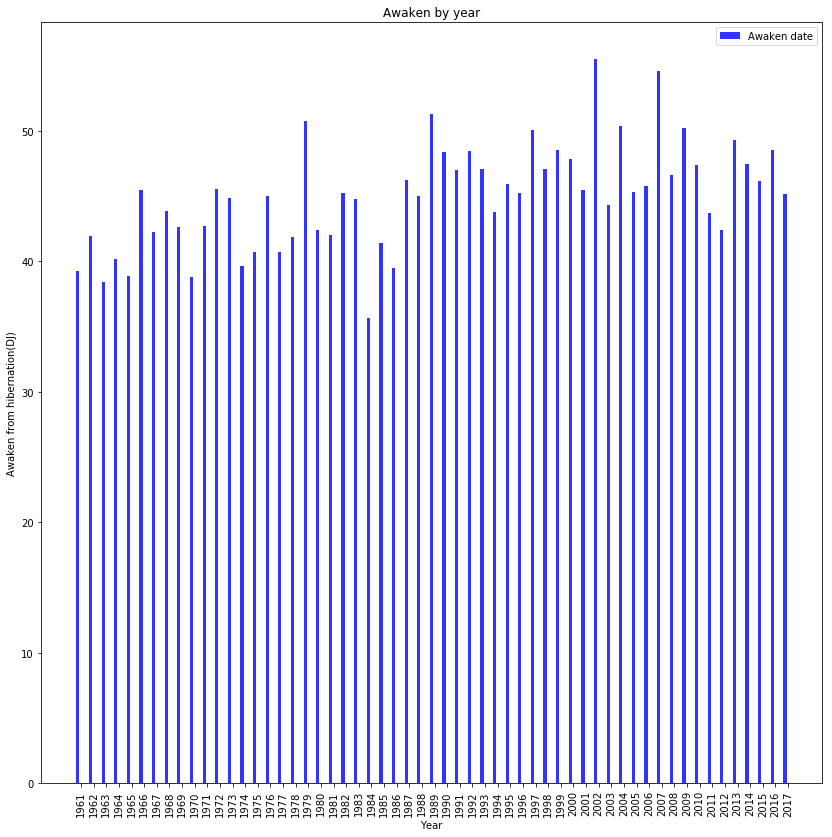

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(4,5))

fig, ax = plt.subplots()
index = np.arange(len(All_years))
bar_width = 0.25
opacity = 0.8
rects1 = plt.bar(index,Awaken, bar_width,alpha=opacity,color='b',label='Awaken date')
plt.rcParams["figure.figsize"] = [14,14]

plt.xlabel('Year')
plt.ylabel('Awaken from hibernation(DJ)')
plt.title('Awaken by year')
plt.xticks(index + bar_width, All_years,rotation=90)

plt.legend()

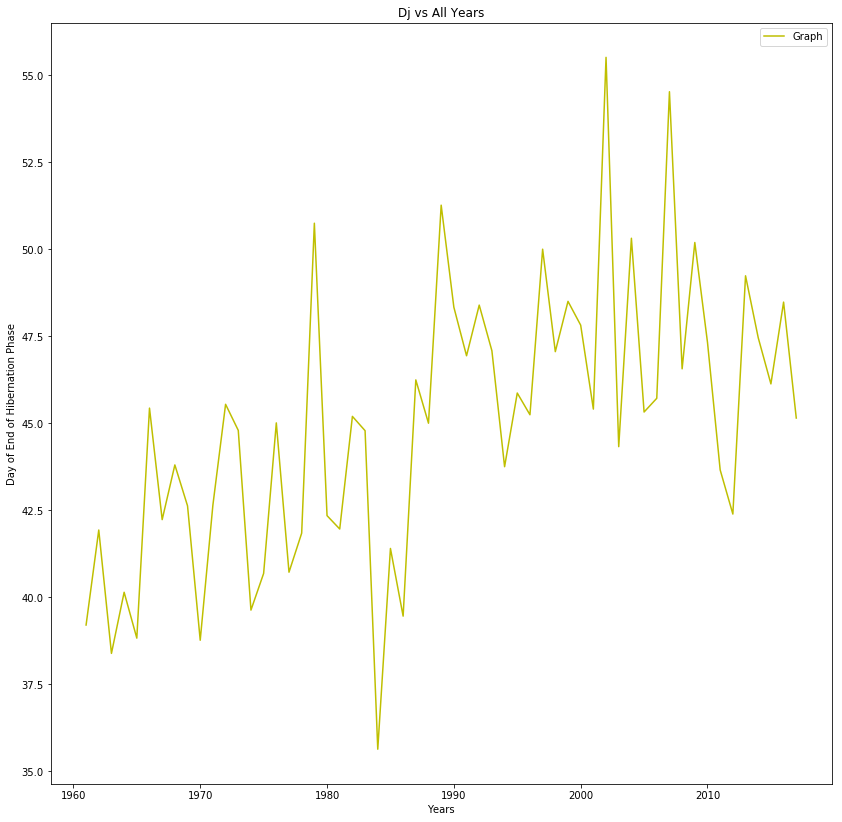

In [14]:
plt.figure(3)
plt.plot(All_years,Awaken,'-y',label="Graph")
plt.xlabel("Years")
plt.ylabel("Day of End of Hibernation Phase")
plt.title("Dj vs All Years")
plt.legend()
plt.show()

### Problem 2-2: (10pts)
Calcluate $DTS_j$ for each year $j$ in the training set for discrete values of $E_{a}$, varying from 5 to 40kcal ($E_{a} = 5, 6, 7, \cdots, 40 \,\rm{kcal}$), and plot this $DTS_j$ against $E_{a}$. Also calculate the average of $DTS_{j}$ over the training period, and indicate it on the plot as $DTS_{mean}$. Pay attention to the units of **every parameter** ($T_{i,j}$, $E_{a}$, ...) in the equation for $t_{s}$. 


In [15]:
DJ=[0]*(len(All_years))        
for i in range(0,57):
    DJ[i]=int(round(Awaken[i]))
print(DJ)
BDJ=[0]*(len(All_years))

[39, 42, 38, 40, 39, 45, 42, 44, 43, 39, 43, 46, 45, 40, 41, 45, 41, 42, 51, 42, 42, 45, 45, 36, 41, 39, 46, 45, 51, 48, 47, 48, 47, 44, 46, 45, 50, 47, 49, 48, 45, 56, 44, 50, 45, 46, 55, 47, 50, 47, 44, 42, 49, 47, 46, 48, 45]


In [16]:

for x in range (0,57):
    
    total=0
    date=0
    counter=0
    year_count=0
    for i in A[x]['bloom']:
        counter=counter+1
        if i==1:
            
            year=A[x].at[counter,'year']
            BDJ[x]=counter
            print(counter,BDJ[x],"Days taken to bloom from begening of year",year)
            break

91 91 Days taken to bloom from begening of year 1961
91 91 Days taken to bloom from begening of year 1962
91 91 Days taken to bloom from begening of year 1963
93 93 Days taken to bloom from begening of year 1964
92 92 Days taken to bloom from begening of year 1965
79 79 Days taken to bloom from begening of year 1966
89 89 Days taken to bloom from begening of year 1967
89 89 Days taken to bloom from begening of year 1968
96 96 Days taken to bloom from begening of year 1969
97 97 Days taken to bloom from begening of year 1970
89 89 Days taken to bloom from begening of year 1971
88 88 Days taken to bloom from begening of year 1972
90 90 Days taken to bloom from begening of year 1973
92 92 Days taken to bloom from begening of year 1974
88 88 Days taken to bloom from begening of year 1975
82 82 Days taken to bloom from begening of year 1976
81 81 Days taken to bloom from begening of year 1977
90 90 Days taken to bloom from begening of year 1978
82 82 Days taken to bloom from begening of yea

In [17]:
DTS_over_all_EA=[0]*36
DTS_list=[0]*36
print(DTS_list)
TS=17+273.15
tranform=4184
R=8.314
DTSMEAN_ALLyears=0
c_dts=0
c=0
DTSmeantrain=0
C_train=0
mean=0
Error=[0]*36
EA_plain=[0]*36
for E in range(0,36):  
    Error_EA=0
    EA_plain[E]=E+5
    EA=(E+5)*tranform
    DTS_EA8=[0]*(len(All_years))
    DTS_mean_all_y=0

    for x in range(0,57):
            Error_year=0
            Temp_total=0
            DTSJ=0       

            for j in range(DJ[x]-1,BDJ[x]):
                TIJ=A[x].at[j,'avg temp']+273.15
                Temp=np.exp((EA*(TIJ-TS))/(R*TIJ*TS))
                DTSJ=DTSJ+Temp
            year=A[x].at[j,'year']
            DTS_EA8[x]=DTSJ
            c_dts=c_dts+1
          
           # print ("Year",year,"EA value",EA,"DTS of the year",DTSJ,DTS_EA8[x],x)
            DTS_mean_all_y=DTSJ+DTS_mean_all_y
            if (A[x].at[0,'year'] in train_years):
                DTSmeantrain=DTSmeantrain+DTSJ
                C_train=C_train+1
                Error_year=((int(DTSJ)+DJ[x])-BDJ[x])*((int(DTSJ)+DJ[x])-BDJ[x])
                Error_EA=Error_EA+Error_year
    Error[E]=Error_EA/52            
    DTS_list[E]=DTS_EA8
    DTS_mean_all_y=DTS_mean_all_y/57
    DTS_over_all_EA[E]=DTS_mean_all_y

    DTSMEAN_ALLyears=DTSMEAN_ALLyears+DTS_mean_all_y

    #print(E+5,DTS_mean_all_y)

    c=c+1
print(c)

df3={'Ea':EA_plain,'DTSmean':DTS_over_all_EA}
df3=pd.DataFrame(data=df3)
df3=df3[['Ea','DTSmean']]
print('\n',df3)

#print(DTSMEAN_ALLyears)
DTSMEAN_ALLyears=DTSMEAN_ALLyears/36
print("DTS mean over all year",DTSMEAN_ALLyears)
print("DTS mean over training year",DTSmeantrain/C_train)
DTSmeantrain=DTSmeantrain/C_train
Temp=[DTSMEAN_ALLyears]*(len(All_years))
Temp2=[int(DTSmeantrain)]*(len(All_years))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
36

     Ea    DTSmean
0    5  32.010286
1    6  30.308617
2    7  28.709838
3    8  27.207251
4    9  25.794621
5   10  24.466136
6   11  23.216385
7   12  22.040322
8   13  20.933245
9   14  19.890769
10  15  18.908805
11  16  17.983536
12  17  17.111405
13  18  16.289088
14  19  15.513484
15  20  14.781698
16  21  14.091022
17  22  13.438932
18  23  12.823065
19  24  12.241213
20  25  11.691314
21  26  11.171436
22  27  10.679775
23  28  10.214642
24  29   9.774456
25  30   9.357737
26  31   8.963099
27  32   8.589245
28  33   8.234959
29  34   7.899102
30  35   7.580606
31  36   7.278470
32  37   6.991755
33  38   6.719580
34  39   6.461119
35  40   6.215598
DTS mean over all year 15.155072582465683
DTS mean over training year 15.095695814399521


In [18]:
print(DTS_over_all_EA[1])

30.308616918606123


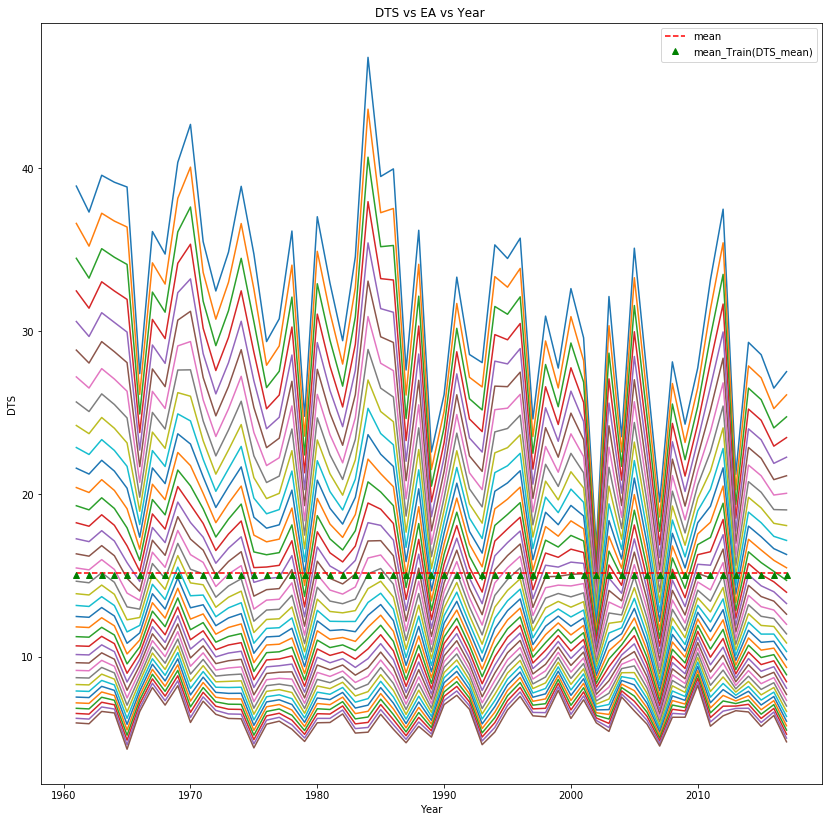

In [19]:
for i in range(0,36):
    plt.plot(All_years,DTS_list[i])
    
plt.plot(All_years,Temp,'r--',label='mean')
plt.plot(All_years,Temp2,'g^',label='mean_Train(DTS_mean)')

plt.legend()
plt.ylabel('DTS')
plt.xlabel('Year')
plt.title('DTS vs EA vs Year ')
plt.show()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


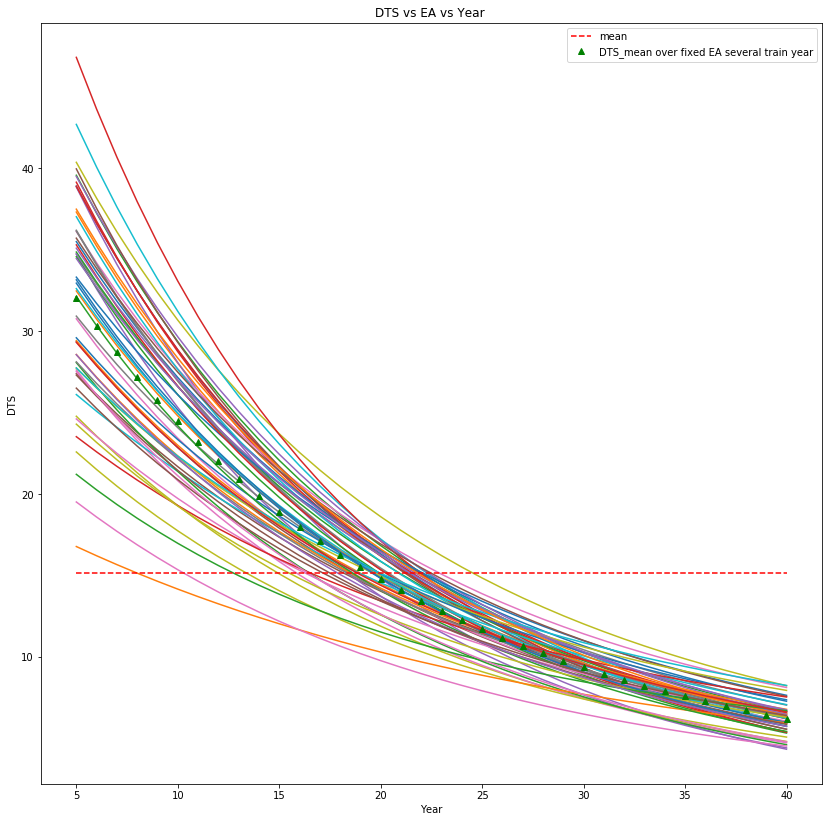

In [20]:
New_DTS_List= [*zip(*DTS_list)]
EA_list=[0]*36
for i in range(0,36):
    EA_list[i]=i+5
print(EA_list)
Temp3=[DTSMEAN_ALLyears]*(len(EA_list))
Temp4=DTS_over_all_EA

for i in range(0,57):
    plt.plot(EA_list,New_DTS_List[i])
    
plt.plot(EA_list,Temp3,'r--',label='mean')
plt.plot(EA_list,Temp4,'g^',label='DTS_mean over fixed EA several train year')

plt.legend()
plt.ylabel('DTS')
plt.xlabel('Year')
plt.title('DTS vs EA vs Year ')
plt.show()

### Problem 2-3: (11pts)
Using the same $E_{a}$ values and calculated $DTS_{mean}$ from 2-2, predict the bloom date $BD_{j}$ for each of the training years. Find the mean squared error relative to the actual $BD$ and plot it against $E_{a}$. Find the optimal $E_{a}^{*}$ that minimizes that error on the training data.

In [21]:
Error=[0]*36
TS=17+273.15
tranform=4084
R=8.314
DTSMEAN_ALLyears=0
c_dts=0
c=0
DTSmeantrain=0
C_train=0

def Average(lst): 
    return sum(lst) / len(lst)
for E in range(0,36):  
    EA=(E+5)*tranform
    DTS_EA8=[0]*(len(All_years))
    DTS_mean_all_y=0
    Error_EA=0
    Error_year_list=[]
    for x in range(0,57):
            daycount=0          
            Error_year=0
            Temp_total=0
            DTSJ=0 
            TSE=0
            for j in range(DJ[x]-1,BDJ[x]):
                TIJ=A[x].at[j,'avg temp']+273.15
                Temp1=m.exp((EA*(TIJ-TS))/(R*TS*TS))
                TSE=TSE+Temp1
                c_dts=c_dts+1
                daycount=daycount+1
                if TSE>=DTS_over_all_EA[E]:
                    year=A[x].at[j,'year']
                    #print("year",year,"Actual",BDJ[x],"EA",E+5,"Predict",daycount+DJ[x])
                    break
            year=A[x].at[j,'year']
            DTS_EA8[x]=DTSJ
            DTS_mean_all_y=DTSJ
            if (A[x].at[0,'year'] in train_years):
                DTSmeantrain=DTSmeantrain+DTSJ
                C_train=C_train+1
                Error_year=(daycount+DJ[x]-BDJ[x])*(daycount+DJ[x]-BDJ[x])
                Error_year_list.append(Error_year)
                Error_EA=Error_EA+Error_year
    Error[E]=Average(Error_year_list)  
    DTS_list[E]=DTS_EA8
    DTSMEAN_ALLyears=DTSMEAN_ALLyears+DTS_mean_all_y
print("Error in train year:",Error)
Optimal_Ea=EA_plain[Error.index(min(Error))]
print("OPtimal EA",Optimal_Ea)



Error in train year: [23.865384615384617, 22.384615384615383, 20.53846153846154, 18.25, 17.423076923076923, 15.653846153846153, 14.75, 12.807692307692308, 12.557692307692308, 11.096153846153847, 10.0, 9.673076923076923, 8.634615384615385, 8.096153846153847, 6.961538461538462, 6.5576923076923075, 6.038461538461538, 5.480769230769231, 5.173076923076923, 5.173076923076923, 5.173076923076923, 4.769230769230769, 4.615384615384615, 4.634615384615385, 4.5, 4.576923076923077, 4.288461538461538, 4.384615384615385, 4.596153846153846, 4.75, 4.923076923076923, 5.173076923076923, 5.326923076923077, 5.653846153846154, 5.653846153846154, 5.653846153846154]
OPtimal EA 31


No handles with labels found to put in legend.


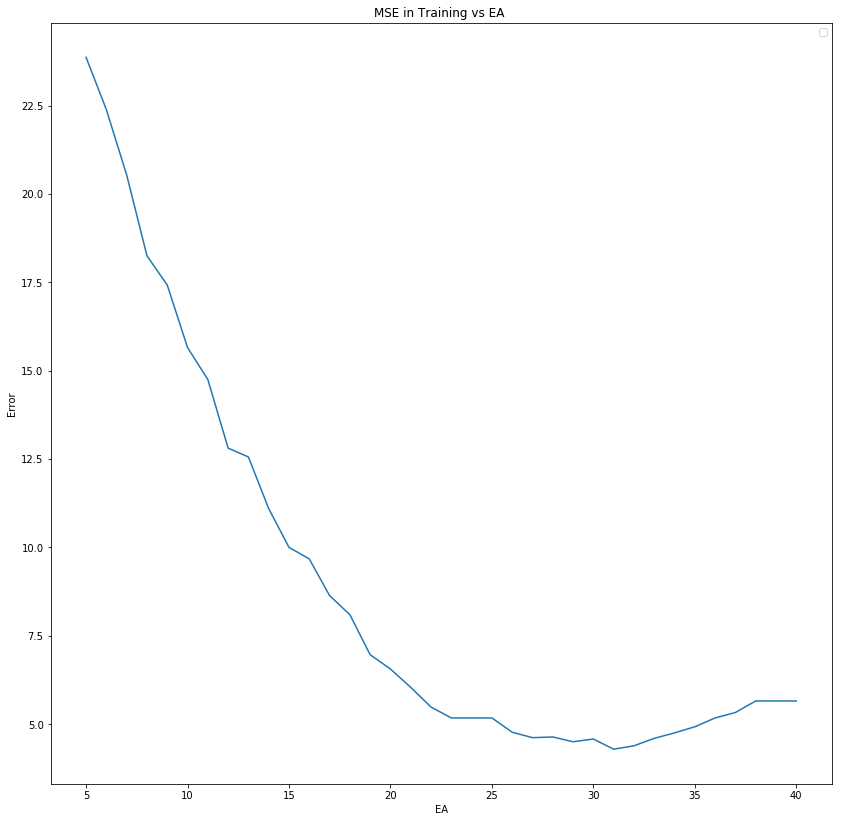

In [22]:
plt.plot(EA_plain,Error)

plt.legend()
plt.ylabel('Error')
plt.xlabel('EA')
plt.title('MSE in Training vs EA ')
plt.show()

### Problem 2-4: (4pts)

Using the $D_j$ dates from problem 2-1, the average $DTS_{mean}$ from 2-2, and the best-fit $E_{a}^{*}$ from 2-3, predict the bloom-dates $BD_j$ for the years in the test set. Determine the error between your predicted $BD_j$ values and the actual values, and evaluate this model using the coefficient of determination ($R^2$ score).

USING DTS mean

In [23]:
Error_test=[0]*5
DTSMEAN_ALLyears=0
c=0
DTSmeantrain=0
C_test=0
Pred_DTS_test=[0]*5

for E in range(31,32):  
    EA=(E+5)*tranform
    DTS_EA8=[0]*(len(All_years))
    DTS_mean_all_y=0
    Error_EA=0
    Error_year_list=[]
    for x in range(0,57):
            daycount=0          
            Error_year=0
            Temp_total=0
            DTSJ=0 
            TSE=0

            for j in range(DJ[x]-1,BDJ[x]):
                TIJ=A[x].at[j,'avg temp']+273.15
                Temp1=m.exp((EA*(TIJ-TS))/(R*TS*TS))
                TSE=TSE+Temp1
                daycount=daycount+1
                
                if TSE>=DTS_over_all_EA[E]:
                    year=A[x].at[j,'year']
                    break
            DTS_EA8[x]=DTSJ
            
            DTS_mean_all_y=DTSJ
            if (A[x].at[0,'year'] in test_years):
                DTSmeantrain=DTSmeantrain+DTSJ
                Error_year=(daycount+DJ[x]-BDJ[x])*(daycount+DJ[x]-BDJ[x])
                Error_year_list.append(Error_year)
                Error_EA=Error_EA+Error_year
                Pred_DTS_test[C_test]=daycount+DJ[x]
                print("year",year,"Actual",BDJ[x],"EA",E+5,"Predict",daycount+DJ[x])
                C_test=C_test+1
print(Pred_DTS_test)




year 1966 Actual 79 EA 36 Predict 77
year 1971 Actual 89 EA 36 Predict 88
year 1985 Actual 93 EA 36 Predict 91
year 1994 Actual 90 EA 36 Predict 91
year 2008 Actual 82 EA 36 Predict 82
[77, 88, 91, 91, 82]


In [24]:
ANN_datafram=data.drop(data[(data['month']>4)].index).reset_index(drop=True)
train_datafram=ANN_datafram.loc[~ANN_datafram['year'].isin(['1966', '1971', '1985', '1994','2008'])].reset_index(drop=True)
test_datafram = ANN_datafram.loc[ANN_datafram['year'].isin(['1966', '1971', '1985', '1994','2008'])].reset_index(drop=True)

In [25]:
test_year_frame=[]

train_year_frame=[]
for i in range (0,5):
    test_year_frame.append(test_datafram.loc[test_datafram['year'].isin([test_years[i]])].reset_index(drop=True))
for j in range (0,52):
    train_year_frame.append(train_datafram.loc[train_datafram['year'].isin([train_years[j]])].reset_index(drop=True))   
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [26]:

Y_Test_bloom=[0]*5
for x in range (0,5):
    counter=0
    for i in test_year_frame[x]['bloom']:
        counter=counter+1
        if i==1:
            year=test_year_frame[x].at[counter,'year']
            Y_Test_bloom[x]=counter
            print(year,Y_Test_bloom[x]) 
Y_Test_bloom_np=np.array(Y_Test_bloom).astype(np.float32)
Y_Test_bloom_np=Y_Test_bloom_np.reshape((np.shape(Y_Test_bloom_np)[0], 1))
Y_Test_bloom_np.shape
        

1966 79
1971 89
1985 93
1994 90
2008 82


(5, 1)

In [27]:
print("R2 Score  for optimal EA in test set ",r2_score(Pred_DTS_test,Y_Test_bloom))

R2 Score  for optimal EA in test set  0.9336870026525199


### Problem 2-5: (extra 10pts)
Discuss any improvements you could make to the model outlined above. If you have a suggestion in particular, describe it. How much do you think the accuracy would be improved?

1.According to the mentioned model and datasets, there is an assumption that the average temperature of a single day is sustained throughout the day. This is not the case in real life as the temperature can flactuate even from hour to hour. So if the fluctuations of the temperature could be added, the accuracy and could possibly be improved.



2.There are different species of cherry trees from the Prunus genus. Different species of trees might have different type if implecations to different changes of variables. We did not take that into account. If we can take those things into consideration, accuracy might be improved.

1.The dataset is too small and there are few features, we need to increase the data.

2."Quantitative description of the effect of stratification on dormancy release of grape seeds in response to various temperatures and water contents"( WQ Wang -2009).These approach can be used since more popularity.This work should be considered.It uses humidity as consideration.

3.Hibernation and DTS should be calculated from each and every molicular activity in order to get accuary to day.This method is accurate upto week.(equation of Hayashi et al.(2012) )


***
## 3. Predicting Bloom-date via Neural Network (30pts total)

### Problem 3-1: (20pts)

Build a neural network and train it on the data from the training years. Use this model to predict the bloom-dates for each year in the test set. Evaluate the error between predicted dates and actual dates using the coefficient of determination (R2 score). Only use the weather data given in `tokyo.csv` and the sakura data acquired in problem 0-1.</br>
You may use whichever framework or strategy that you like to construct the network. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


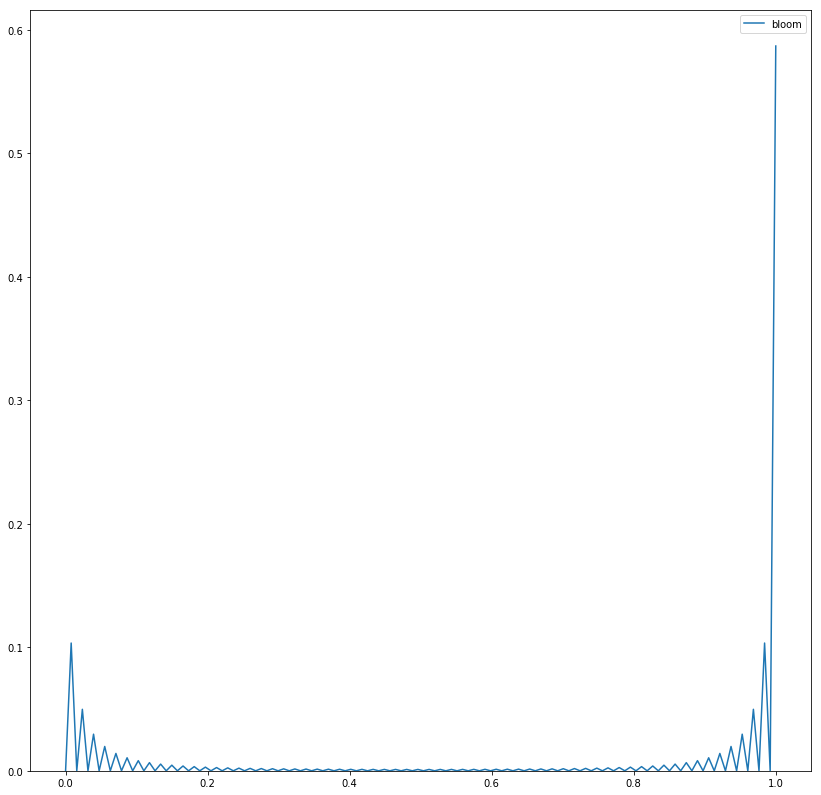

In [28]:
sns.kdeplot(data['bloom'])


In [29]:
test_year_mean_frame=[]

for k in range(0,5):
    test_year_mean_frame.append(pd.DataFrame(test_year_frame[k].sum()).T)
    test_year_mean_frame[k]=test_year_mean_frame[k].drop(['bloom','serial','day','month','year'], axis=1)
    if k==0:
        test_year_mean_frame_np = test_year_mean_frame[k].as_matrix().astype(np.float32)
    if k>0:
        x_test_temp = test_year_mean_frame[k].as_matrix().astype(np.float32)
        test_year_mean_frame_np=np.concatenate((x_test_temp, test_year_mean_frame_np), axis=0)
test_year_mean_frame_np.shape
test_year_mean_frame_np.tolist()
test_year_mean_frame[1].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours
0,121313.9,121841.6,271.5,81.0,27.0,986.3,1491.9,515.0,6594.0,4407.0,698.3


In [30]:

train_year_mean_frame=[]
train_year_mean_frame2=[]
for l in range(0,52):
    train_year_mean_frame.append(pd.DataFrame(train_year_frame[l].sum()).T)
    train_year_mean_frame2.append(pd.DataFrame(train_year_frame[l].mean()).T)

    train_year_mean_frame[l]=train_year_mean_frame[l].drop(['bloom','serial','day','month','year'], axis=1)
    if l==0:
        train_year_mean_frame_np = train_year_mean_frame[l].as_matrix().astype(np.float32)
    if l>0:
        x_train_temp = train_year_mean_frame[l].as_matrix().astype(np.float32)
        train_year_mean_frame_np=np.concatenate((x_train_temp, train_year_mean_frame_np), axis=0)
train_year_mean_frame_np.shape



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


(52, 11)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

train_year_mean_frame_np = scaler.fit_transform( train_year_mean_frame_np)



In [31]:
Y_Train_bloom=[0]*52
for x in range (0,52):
    counter=0
    for i in train_year_frame[x]['bloom']:
        counter=counter+1
        if i==1:
            year=train_year_frame[x].at[counter,'year']
            Y_Train_bloom[x]=counter
            print(year,Y_Train_bloom[x]) 
Y_Train_bloom_np=np.array(Y_Train_bloom).astype(np.float32)
Y_Train_bloom_np=Y_Train_bloom_np.reshape((np.shape(Y_Train_bloom_np)[0], 1))
Y_Train_bloom_np.shape

1961 91
1962 91
1963 91
1964 93
1965 92
1967 89
1968 89
1969 96
1970 97
1972 88
1973 90
1974 92
1975 88
1976 82
1977 81
1978 90
1979 82
1980 91
1981 85
1982 82
1983 90
1984 102
1986 93
1987 82
1988 93
1989 79
1990 79
1991 89
1992 84
1993 83
1995 90
1996 91
1997 80
1998 86
1999 83
2000 90
2001 82
2002 75
2003 86
2004 78
2005 90
2006 80
2007 79
2009 80
2010 81
2011 87
2012 91
2013 75
2014 84
2015 82
2016 81
2017 80


(52, 1)

In [32]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout,MaxPooling2D,LSTM
from keras.layers.embeddings import Embedding
model = Sequential()


###def coeff_determination(y_true, y_pred):
###    SS_res =  K.sum(K.square( y_true-y_pred )) 
###    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
###    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


Using TensorFlow backend.


In [34]:


model.add(Dense(50, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))



model.add(Dense(32, kernel_initializer='normal', activation='relu'))

model.add(Dense(24, kernel_initializer='normal', activation='relu'))

model.add(Dense(12, kernel_initializer='normal', activation='relu'))

model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mae', optimizer='adam',metrics=['mse','mae'])
model.fit(train_year_mean_frame_np, Y_Train_bloom_np,epochs=50, batch_size=10)
model.evaluate(test_year_mean_frame_np, Y_Test_bloom_np, batch_size=5)
Deep1_pred=model.predict(test_year_mean_frame_np)


Epoch 1/50
52/52 [==============================] - 1s 16ms/step - loss: 86.2478 - mean_squared_error: 7472.7196 - mean_absolute_error: 86.2478
Epoch 2/50
52/52 [==============================] - 0s 191us/step - loss: 86.2415 - mean_squared_error: 7471.6260 - mean_absolute_error: 86.2415
Epoch 3/50
52/52 [==============================] - 0s 230us/step - loss: 86.2349 - mean_squared_error: 7470.4921 - mean_absolute_error: 86.2349
Epoch 4/50
52/52 [==============================] - 0s 192us/step - loss: 86.2282 - mean_squared_error: 7469.3315 - mean_absolute_error: 86.2282
Epoch 5/50
52/52 [==============================] - 0s 153us/step - loss: 86.2213 - mean_squared_error: 7468.1539 - mean_absolute_error: 86.2213
Epoch 6/50
52/52 [==============================] - 0s 153us/step - loss: 86.2143 - mean_squared_error: 7466.9408 - mean_absolute_error: 86.2143
Epoch 7/50
52/52 [==============================] - 0s 154us/step - loss: 86.2071 - mean_squared_error: 7465.7051 - mean_absolute_e

In [35]:
print(Deep1_pred)

[[82.54127 ]
 [81.87138 ]
 [82.365326]
 [81.96643 ]
 [81.94809 ]]


In [36]:
import sklearn.neural_network
hl=[10 for i in range(21)]
hl=tuple(hl)
rgr=sklearn.neural_network.MLPRegressor(hidden_layer_sizes=hl,activation='identity',solver="lbfgs", 
                                        alpha=20,learning_rate='invscaling',random_state=10)
Ytes=Y_Test_bloom
Ytrn=Y_Train_bloom

Xtrn=train_year_mean_frame_np.tolist()
Xtes=test_year_mean_frame_np.tolist()
rgr=rgr.fit(Xtrn,Ytrn)
PDaysNN=rgr.predict(Xtes)
print(PDaysNN)
def dim(a):
    if not type(a) == list:
        return []
    return [len(a)] + dim(a[0])
dim(Xtrn)
type(Xtrn[0][1])
print("R2 score",r2_score(PDaysNN,Ytes))

[79.21800486 89.84442767 88.46240003 92.09822036 80.76358118]
R2 score 0.7924038471356027


Another DNN

In [37]:
data.head()

,serial,year,month,day,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom
0,0,1961,1,1,1011.7,1012.4,0.0,0.0,0.0,2.1,7.9,-3.9,41,15,8.6,0
1,1,1961,1,2,1020.2,1021.0,0.0,0.0,0.0,1.5,9.2,-3.3,51,26,8.7,0
2,2,1961,1,3,1021.3,1022.1,0.1,0.8,0.0,2.5,7.3,-2.4,58,37,5.4,0
3,3,1961,1,4,1004.6,1005.3,20.2,13.9,3.2,4.7,11.5,0.6,60,38,1.0,0
4,4,1961,1,5,1016.3,1017.0,0.0,0.0,0.0,3.8,7.7,1.4,33,19,8.3,0


This approach will be to balancing sample and making hard loss for macking incorrect prediction for positive y value. Due to time constrain this appoach is not completed yet.


### Problem 3-2: (10pts)
Compare the performance (via $R^2$ score) of the 3 implementations above: the 600 Degree Rule, the DTS method, and the neural network approach. For all methods, and each test year, plot the predicted date vs. the actual date. Discuss the accuracy and differences of these 3 models.

1.The 600 Degree Rule $R^2$ is 0.6793002915451896.<br />
2.Tmean $R^2$ is 0.8323615160349854<br />
3.DTS method  $R^2$ is 0.949<br />
4.Deep model $R^2$ is 0.5685138702392578(non optimized)<br />
5.Deep model $R^2$ is 0.7924038471356027 (optimized)<br />
7.Deep model $R^2$ is 0.93(manual year dropout to make gaussion distribution like bloom date)<br />
8.Working on LSTM and hard negatives<br />


Comparison of Performance:
The DTS method perfoms better than the 600 Degree Rule which is obvious because 600 Degree Rule takes into account only one feature(Daily Max Temperature) whereas the DTS method goes for a more sophisticated approach taking intoaccount Hibernation pattern, Temperature, Activation Energy, Standard Reaction Time etc.
The Neural Network also performs well but it requires finding the most optimized network by parameter tuning.The non optimized deep net is no better then taking the mean of days taken but it can be made ppowerful though analysis.

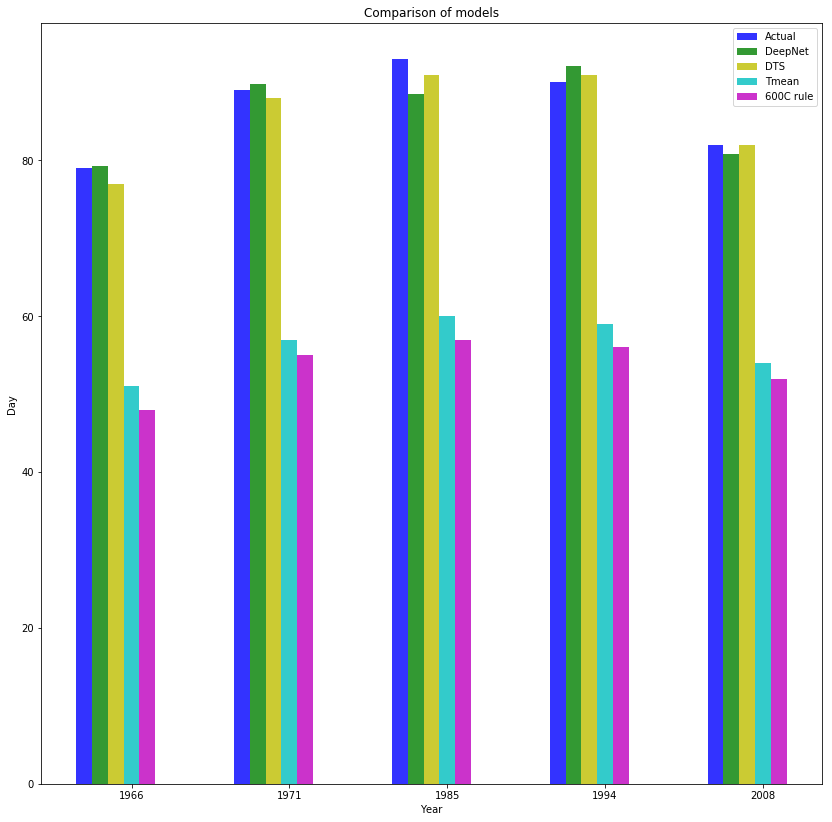

In [38]:
fig, ax = plt.subplots()
index = np.arange(len(test_years))
bar_width = 0.10
opacity = 0.8

rects1 = plt.bar(index, Y_Test_bloom, bar_width,alpha=opacity,color='b',label='Actual')
rects2 = plt.bar(index + bar_width, PDaysNN, bar_width,alpha=opacity,color='g',label='DeepNet')
rects3 =plt.bar(index + (bar_width*2), Pred_DTS_test, bar_width,alpha=opacity,color='y',label='DTS')
rects4 =plt.bar(index + (bar_width*3), Tmean, bar_width,alpha=opacity,color='c',label='Tmean')
rects5 =plt.bar(index + (bar_width*4), T_600, bar_width,alpha=opacity,color='m',label='600C rule')


plt.xlabel('Year')
plt.ylabel('Day')
plt.title('Comparison of models')
plt.xticks(index + (bar_width*3), test_years)
plt.legend()

***
## 4. Trends of the Sakura blooming phenomenon (20pts total)

### Problem 4-1: (20pts)
Based on the data from the past 60 years, investigate and discuss trends in the sakura hibernation ($D_{j}$) and blooming ($BD_{j}$) phenomena in Tokyo.

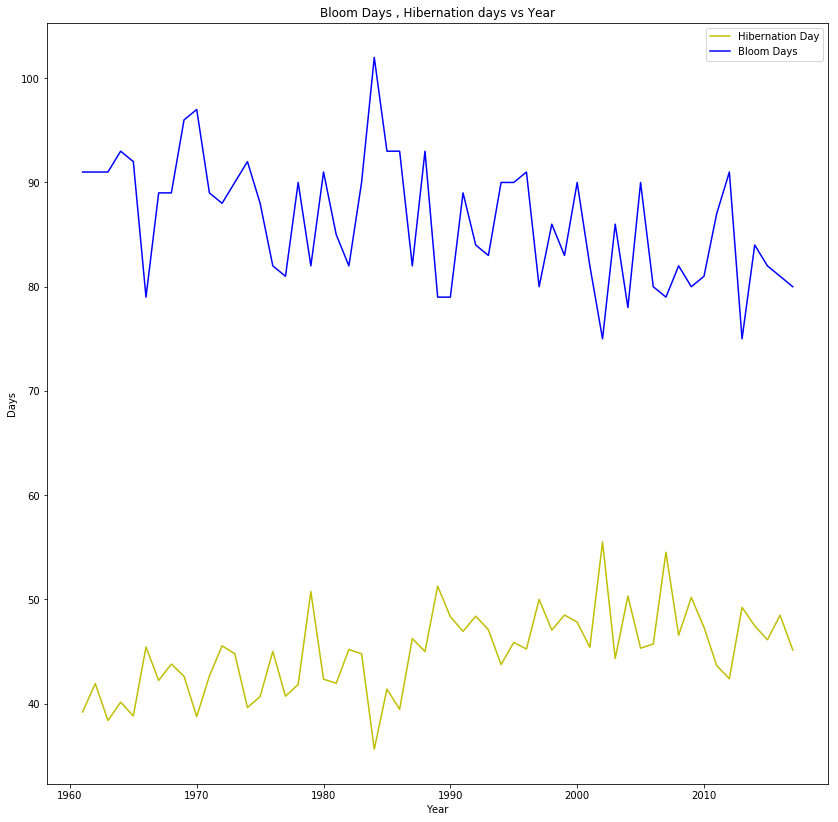

In [39]:
plt.figure(7)
plt.plot(All_years,Awaken,'-y',label='Hibernation Day')
plt.plot(All_years,BDJ,'-b',label='Bloom Days')
plt.xlabel('Year')
plt.ylabel('Days')
plt.title('Bloom Days , Hibernation days vs Year')
plt.legend()



In [40]:
diff=[0]*57
D_int=[0]*57
for t in range (0,57):
    diff[t]=abs(BDJ[t]-D[t])
      
print(diff)

[51.79334776702071, 49.06281748924294, 52.60849332257627, 52.85189457592284, 53.170097489242934, 33.55944460035405, 46.76427082257627, 45.19205482830783, 53.369011267020724, 58.230365322576276, 46.343570822576275, 42.44993675078096, 45.19876282257626, 52.364401933687375, 47.31046310035405, 36.98425395884761, 40.275313933687386, 48.153312452205896, 31.245325044798506, 48.64990158594579, 43.03395221146516, 36.7972755447985, 45.207929785539235, 66.36216339007572, 51.59262045220589, 53.537871100354046, 35.748654433687385, 47.9933851024293, 27.727098285539228, 30.659707544798508, 42.054826378131835, 35.59903497563303, 35.91236495220591, 46.24335571146517, 44.12578726702071, 45.750479529430876, 29.992128285539238, 38.93696948924293, 34.491070822576276, 42.17532995812306, 36.58751971146516, 19.4789841559096, 41.667201100354056, 27.677802896174036, 44.671593044798485, 34.27730015590961, 24.466696452205895, 35.43032076237375, 29.80001628553923, 33.670309489242946, 43.336039989242934, 48.6042648

Text(0.5, 1.0, 'Difference(Days) vs Year')

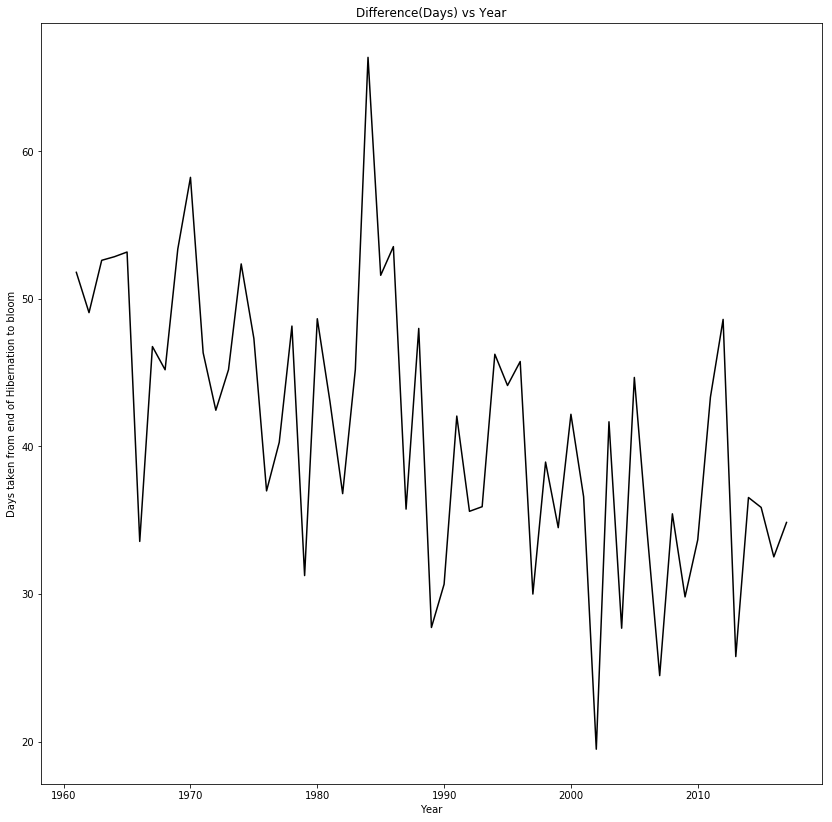

In [41]:

plt.figure(8)
plt.plot(All_years,diff,'-k')
plt.xlabel('Year')
plt.ylabel('Days taken from end of Hibernation to bloom')
plt.title('Difference(Days) vs Year')

Cherry blossoms' flowering and full bloom are dependent on temperature patterns starting as early as autumn of the prior year, since the buds form in the summer and enter a dormancy period throughout the winter that helps them survive until temperatures start to rise again. For this reason, unusual increases in temperature can trigger an earlier flowering date.From the Graphs , we see that that the Hibernation Pattern has changed over the past years. In recent
years, End of Hibernation takes place with a noticeable delay compared to the past years although there are fluctuations.
This is because the max temparature has deceased over the recent years. Temperature has a direct impact on Hibernation Pattern. As it decreases, Hibernation Period tends to get longer.
Blooming of Sakura in recent years also comes earlier compared to the past years. Sea Pressure and hummidity might have effect on that.


In [46]:
train_year_mean_frame2[0].head()

,serial,year,month,day,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom
0,59.5,1961.0,2.5,15.525,1014.535833,1015.249167,3.101667,0.999167,0.305833,7.833333,13.186667,3.363333,56.791667,35.691667,6.403333,0.008333


In [47]:
Accumulated_max_temp=[0]*52
Accumulated_sea_pressure=[0]*52
Accumulated_sun_hours=[0]*52
Accumulated_min_temp=[0]*52
Accumulated_avg_temp=[0]*52
Accumulated_min_humid=[0]*52
Accumulated_avg_humid=[0]*52
Accumulated_Hr1_preci=[0]*52
for i in range (0,52):
    Accumulated_max_temp[i]=train_year_mean_frame2[i]['max temp']
    Accumulated_sea_pressure[i]=train_year_mean_frame2[i]['sea pressure']
    Accumulated_sun_hours[i]=train_year_mean_frame2[i]['sun hours']
    Accumulated_avg_temp[i]=train_year_mean_frame2[i]['avg temp']
    Accumulated_min_humid[i]=train_year_mean_frame2[i]['min humid']
    Accumulated_avg_humid[i]=train_year_mean_frame2[i]['avg humid']
    Accumulated_Hr1_preci[i]=train_year_mean_frame2[i]['hr1 preci']
    
    

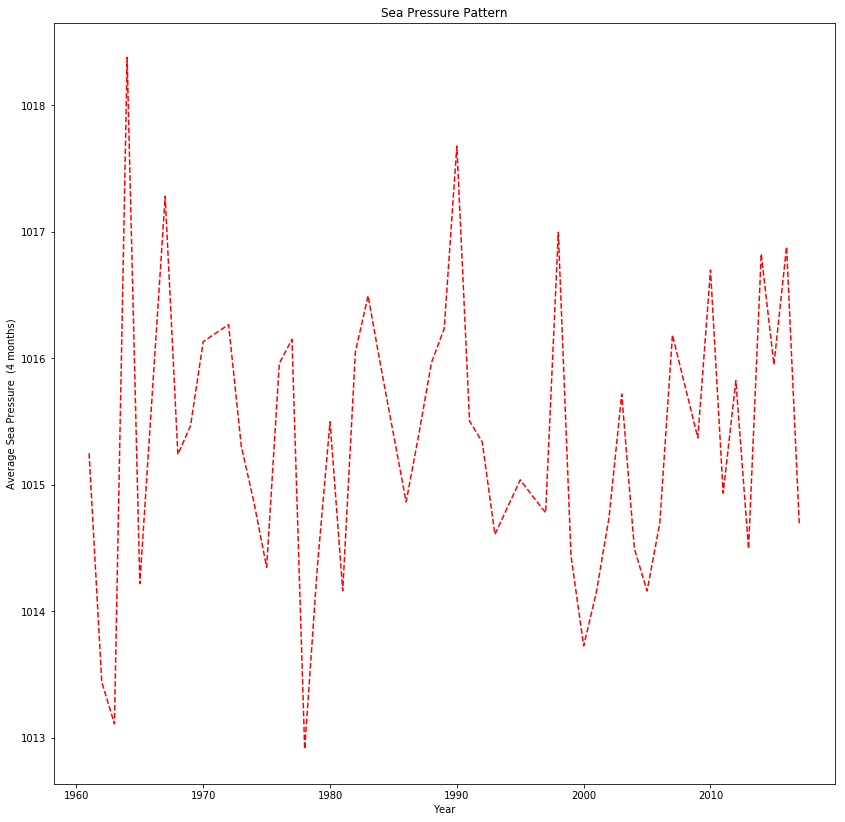

In [48]:
plt.plot(train_years,Accumulated_sea_pressure,'--r')
plt.xlabel('Year')
plt.ylabel('Average Sea Pressure  (4 months)')
plt.title('Sea Pressure Pattern')
plt.show()


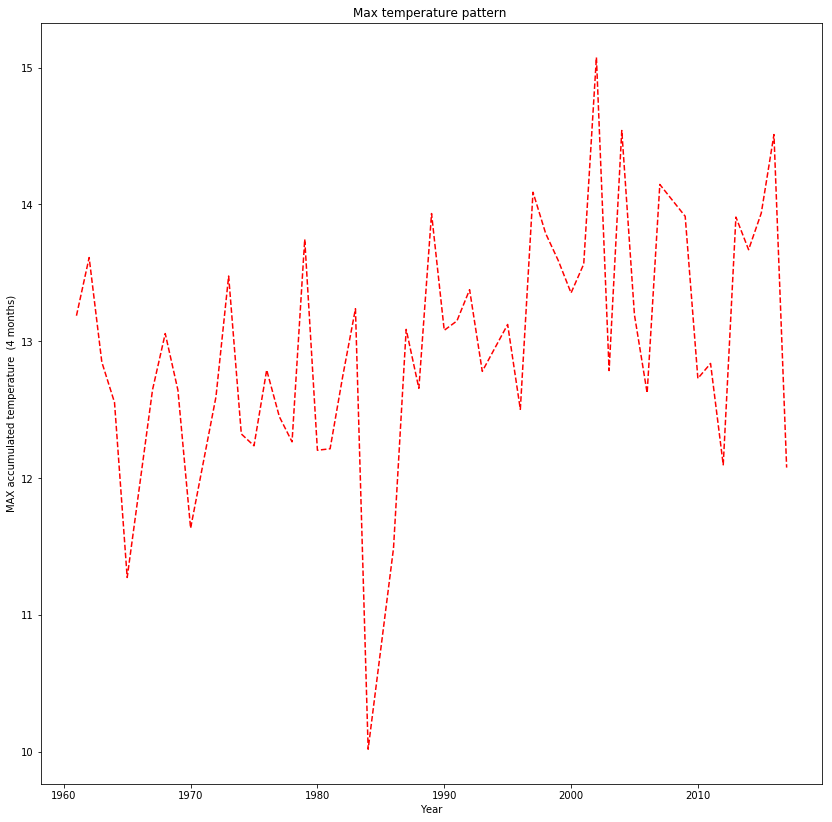

In [49]:
plt.plot(train_years,Accumulated_max_temp,'--r')
plt.xlabel('Year')
plt.ylabel('MAX accumulated temperature  (4 months)')
plt.title('Max temperature pattern ')
plt.show()

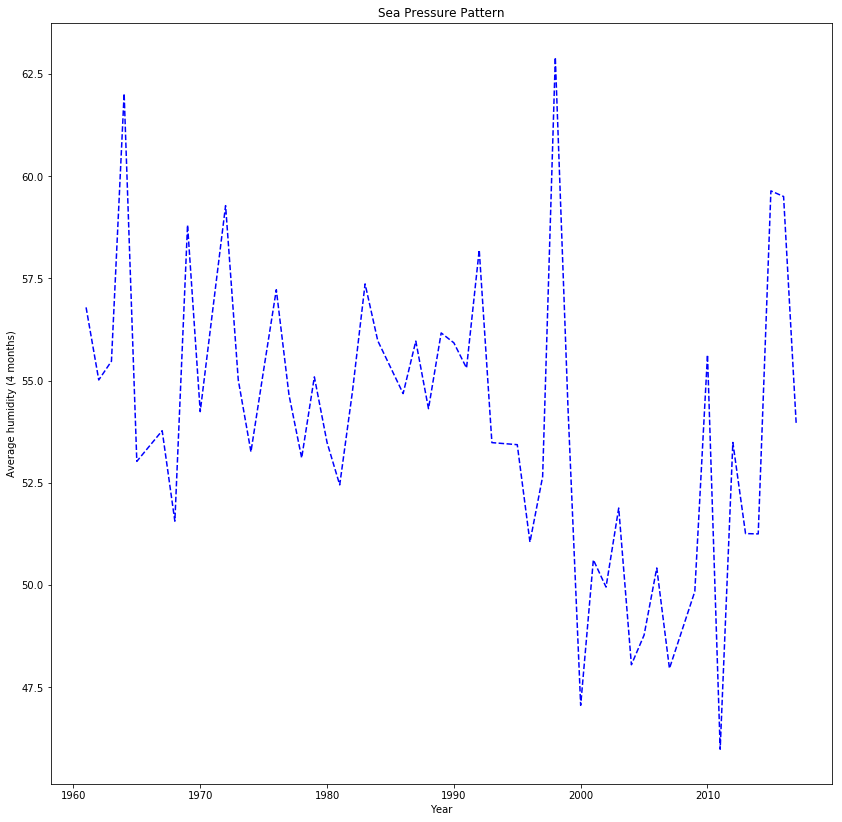

In [50]:
plt.plot(train_years,Accumulated_avg_humid,'--b')
plt.xlabel('Year')
plt.ylabel('Average humidity (4 months)')
plt.title('Sea Pressure Pattern')
plt.show()

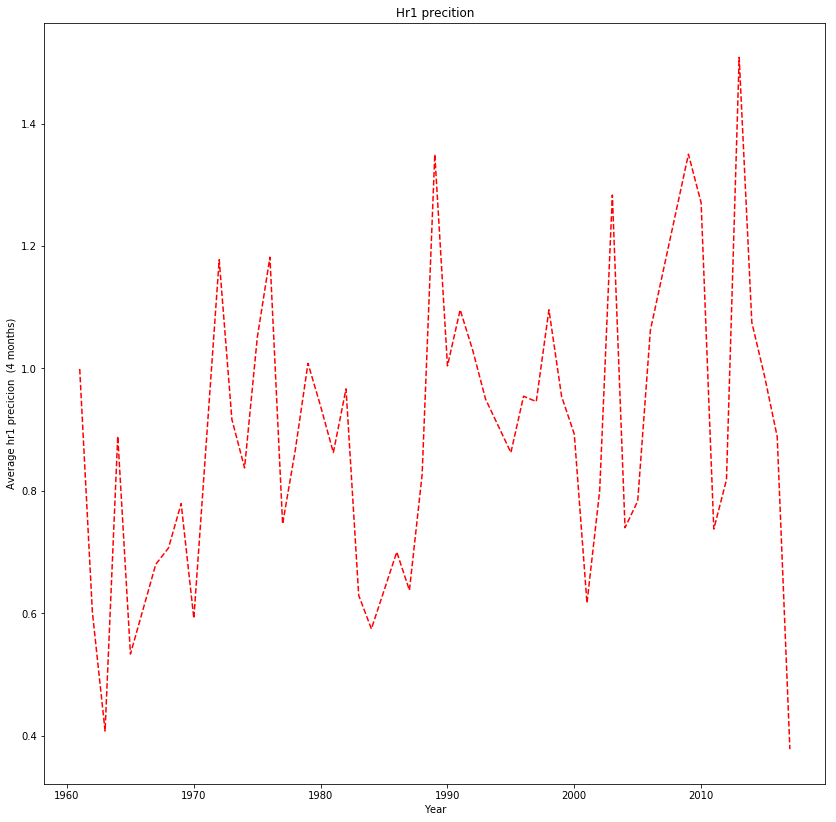

In [51]:
plt.plot(train_years,Accumulated_Hr1_preci,'--r')
plt.xlabel('Year')
plt.ylabel('Average hr1 precicion  (4 months)')
plt.title('Hr1 precition')
plt.show()

From the we can say that hibernation ends much later now a days. This is probably due to decreased maximum temperature over the year. Sea resssure and local pressure might have changed the temparture pattern in recent years. Since the max temparature decressed the hibernation is taking more time now a days.

In [52]:
result=pd.concat(train_year_mean_frame2)
m = np.asarray(Y_Train_bloom)
result["BDS"] = m
result.head()


,serial,year,month,day,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom,BDS
0,59.5,1961.0,2.500000,15.525000,1014.535833,1015.249167,3.101667,0.999167,0.305833,7.833333,13.186667,3.363333,56.791667,35.691667,6.403333,0.008333,91
0,424.5,1962.0,2.500000,15.525000,1012.727500,1013.440000,2.030833,0.601667,0.200000,8.216667,13.611667,3.340000,55.016667,33.816667,6.650833,0.008333,91
0,789.5,1963.0,2.500000,15.525000,1012.396667,1013.110000,1.535833,0.407500,0.117500,7.390833,12.847500,2.615000,55.475000,33.658333,6.861667,0.008333,91
0,1155.0,1964.0,2.495868,15.636364,1017.666116,1018.377686,3.326446,0.889256,0.222314,8.127273,12.552893,4.109091,62.024793,43.586777,4.983471,0.008264,93
0,1520.5,1965.0,2.500000,15.525000,1009.820833,1014.218333,1.583333,0.533333,0.220833,6.799167,11.273333,2.626667,53.025000,34.991667,6.663333,0.008333,92


In [53]:
result=result.drop(['serial','day','month','year','bloom'], axis=1)



In [54]:
result.head()

,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,BDS
0,1014.535833,1015.249167,3.101667,0.999167,0.305833,7.833333,13.186667,3.363333,56.791667,35.691667,6.403333,91
0,1012.727500,1013.440000,2.030833,0.601667,0.200000,8.216667,13.611667,3.340000,55.016667,33.816667,6.650833,91
0,1012.396667,1013.110000,1.535833,0.407500,0.117500,7.390833,12.847500,2.615000,55.475000,33.658333,6.861667,91
0,1017.666116,1018.377686,3.326446,0.889256,0.222314,8.127273,12.552893,4.109091,62.024793,43.586777,4.983471,93
0,1009.820833,1014.218333,1.583333,0.533333,0.220833,6.799167,11.273333,2.626667,53.025000,34.991667,6.663333,92


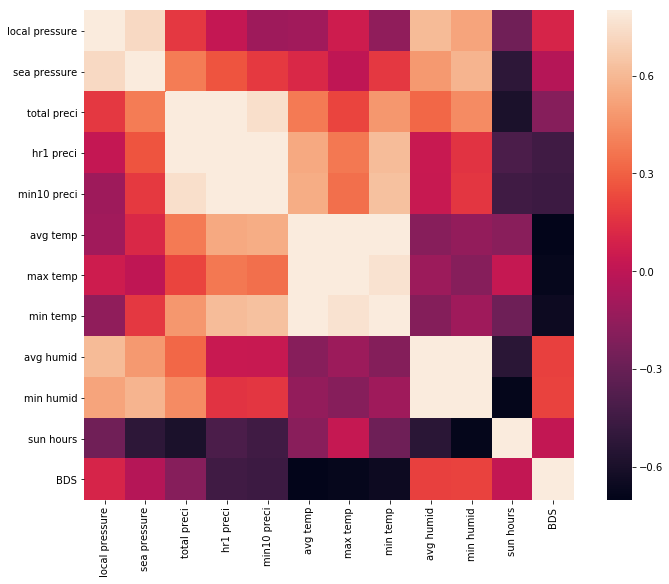

In [55]:
corrmat = result.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Here we can see that days taken to bloom has very high negative correlation with Average,max and min temperature. All of those decressed so the days taken to bloom would have increaded but perhaps the local pressure,sunhours and humidity increased so it is now taking less time from end of hibernation to bloom. In fact in last 60 years the sun hours have not fallen down rapidly like previous.The patten can be seen from differece to 1960-2000 and 2001-2017.  

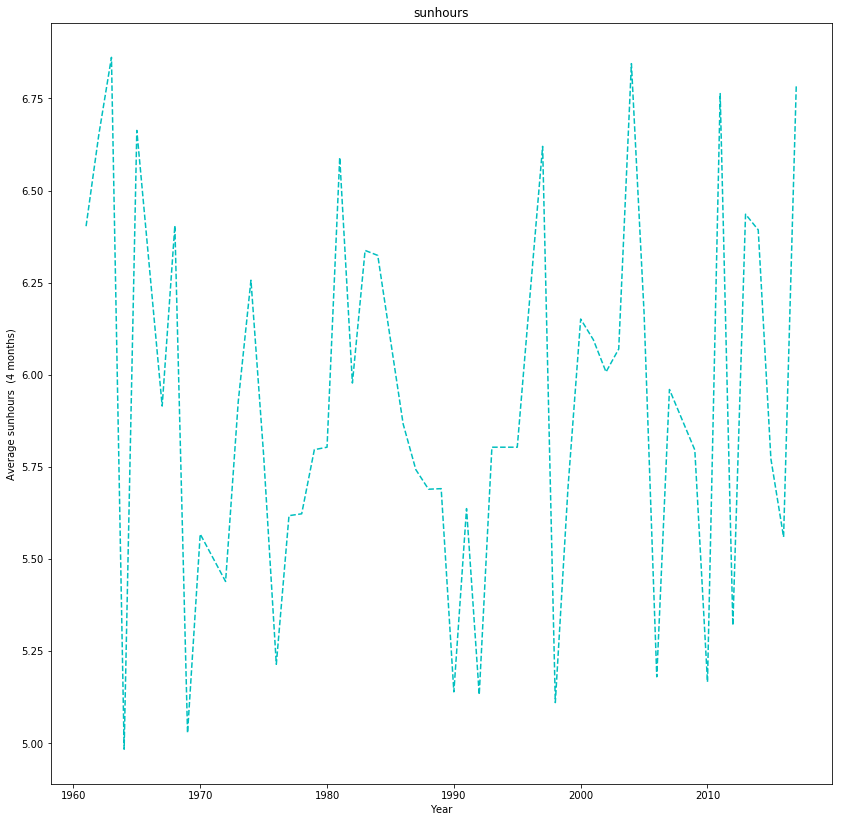

In [56]:
plt.plot(train_years,Accumulated_sun_hours,'--c')
plt.xlabel('Year')
plt.ylabel('Average sunhours  (4 months)')
plt.title('sunhours')
plt.show()

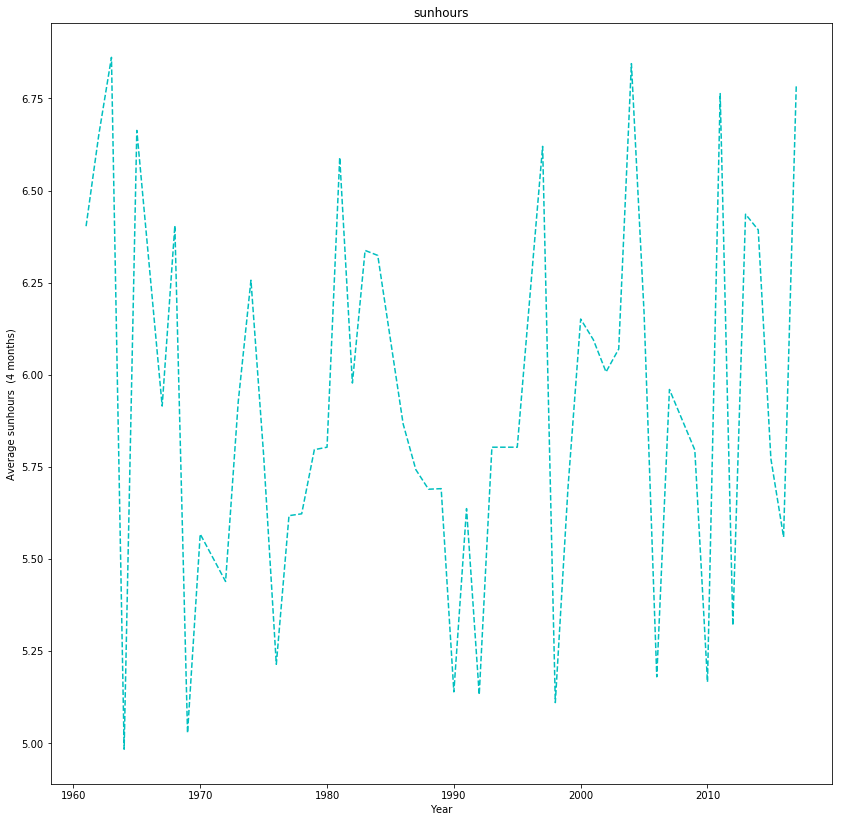

In [57]:
plt.plot(train_years,Accumulated_sun_hours,'--c')
plt.xlabel('Year')
plt.ylabel('Average sunhours  (4 months)')
plt.title('sunhours')
plt.show()